Here we open the json data and normalize the data such that each row corresponds to one ingredient.

The dataset has already been parsed by a CRF model to turn the freeform recipe ingredients into structured data (name, unit, quantity).

In [46]:
import pandas as pd
import json

with open('enriched_recipes.json') as f:
    data = json.load(f)
    df = pd.json_normalize(
        data, 'parsed_ingredients',
        meta=['author',
              'photo_url',
              'prep_time_minutes',
              'rating_stars',
              'review_count',
              'title',
              'total_time_minutes',
              'url'
             ],
        record_prefix='ingredient_', errors='ignore')

The output data looks like this:

In [5]:
df

,ingredient_comment,ingredient_input,ingredient_name,ingredient_other,ingredient_qty,ingredient_unit,ingredient_range_end,author,photo_url,prep_time_minutes,rating_stars,review_count,title,total_time_minutes,url
0,chilled and cubed,"1/2 cup unsalted butter, chilled and cubed",unsalted butter,",",1/2,cup,NaN,Stephanie,http://images.media-allrecipes.com/userphotos/...,55,4.32,46,"Basil, Roasted Peppers and Monterey Jack Cornb...",100,http://allrecipes.com/Recipe/6664/
1,chopped,1 cup chopped onion,onion,NaN,1,cup,NaN,Stephanie,http://images.media-allrecipes.com/userphotos/...,55,4.32,46,"Basil, Roasted Peppers and Monterey Jack Cornb...",100,http://allrecipes.com/Recipe/6664/
2,NaN,1 3/4 cups cornmeal,cornmeal,NaN,1 3/4,cup,NaN,Stephanie,http://images.media-allrecipes.com/userphotos/...,55,4.32,46,"Basil, Roasted Peppers and Monterey Jack Cornb...",100,http://allrecipes.com/Recipe/6664/
3,NaN,1 1/4 cups all-purpose flour,all-purpose flour,NaN,1 1/4,cup,NaN,Stephanie,http://images.media-allrecipes.com/userphotos/...,55,4.32,46,"Basil, Roasted Peppers and Monterey Jack Cornb...",100,http://allrecipes.com/Recipe/6664/
4,NaN,1/4 cup white sugar,white sugar,NaN,1/4,cup,NaN,Stephanie,http://images.media-allrecipes.com/userphotos/...,55,4.32,46,"Basil, Roasted Peppers and Monterey Jack Cornb...",100,http://allrecipes.com/Recipe/6664/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836531,NaN,2 tablespoons brown sugar,brown sugar,NaN,2,tablespoon,NaN,larkspur,http://images.media-allrecipes.com/global/reci...,32,0.0,0,Blueberry Oatmeal Cream Brulee,44,http://allrecipes.com/Recipe/258791/
836532,NaN,2 tablespoons maple syrup,maple syrup,NaN,2,tablespoon,NaN,larkspur,http://images.media-allrecipes.com/global/reci...,32,0.0,0,Blueberry Oatmeal Cream Brulee,44,http://allrecipes.com/Recipe/258791/
836533,NaN,2 tablespoons butter,butter,NaN,2,tablespoon,NaN,larkspur,http://images.media-allrecipes.com/global/reci...,32,0.0,0,Blueberry Oatmeal Cream Brulee,44,http://allrecipes.com/Recipe/258791/
836534,NaN,1 cup blueberries,blueberries,NaN,1,cup,NaN,larkspur,http://images.media-allrecipes.com/global/reci...,32,0.0,0,Blueberry Oatmeal Cream Brulee,44,http://allrecipes.com/Recipe/258791/


Filter the data where recipe ratings are valid (more than 20 reviews and more than 0 stars).

Then, group the ingredients by ingredient name, and average each ingredient's numerical rating.

In [6]:
grouped = df.where(df['rating_stars'] > 0).where(df['review_count'] > 20).groupby("ingredient_name").agg(avg_rating=("rating_stars", "mean")).reset_index()

grouped

In [47]:
pd.set_option('display.max_rows', 1000)

df["ingredient_name"] = df["ingredient_name"].str.lower()

df["ingredient_name"].value_counts().head(1000)


salt                                                             33821
butter                                                           24428
water                                                            19731
all-purpose flour                                                18193
garlic                                                           18066
onion                                                            16757
white sugar                                                      16544
eggs                                                             14806
olive oil                                                        13856
milk                                                             12072
vanilla extract                                                  11438
black pepper                                                     11092
egg                                                              10895
sugar                                                             9583
brown 

In [141]:
name_cleaning_map = {
    "egg": "eggs",
    "tomato": "tomatoes",
    "all-purpose flour": "flour",
    "sugar": "white sugar",
    "salt and black pepper": "salt and pepper",
    "carrot": "carrots",
    "basil leaves": "basil"
}

df["ingredient_name"] = df["ingredient_name"].apply(
    lambda name: name_cleaning_map.get(name, name))

df["ingredient_name"].value_counts().head(1000)

salt                                                             33821
white sugar                                                      26127
eggs                                                             25701
butter                                                           24428
water                                                            19731
flour                                                            19531
garlic                                                           18066
onion                                                            16757
olive oil                                                        13856
milk                                                             12072
vanilla extract                                                  11438
black pepper                                                     11092
salt and pepper                                                   9983
brown sugar                                                       9317
vegeta

In [133]:
spices = [
    'allspice',
    'angelica',
    'anise',
    'asafoetida',
    'bay leaf',
    'basil',
    'bergamot',
    'black cumin',
    'black mustard',
    'black pepper',
    'borage',
    'brown mustard',
    'burnet',
    'caraway',
    'cardamom',
    'cassia',
    'catnip',
    'cayenne pepper',
    'celery seed',
    'chervil',
    'chicory',
    'chili pepper',
    'chives',
    'cicely',
    'cilantro',
    'cinnamon',
    'clove',
    'coriander',
    'costmary',
    'cumin',
    'curry',
    'dill',
    'fennel',
    'fenugreek',
    'filé',
    'garlic powder',
    'ginger',
    'grains of paradise',
    'holy basil',
    'horehound',
    'horseradish',
    'hyssop',
    'lavender',
    'lemon balm',
    'lemon grass',
    'lemon verbena',
    'licorice',
    'lovage',
    'mace',
    'marjoram',
    'nutmeg',
    'oregano',
    'onion powder',
    'paprika',
    'parsley',
    'peppermint',
    'poppy seed',
    'rosemary',
    'rue',
    'saffron',
    'sage',
    'savory',
    'sesame',
    'sorrel',
    'star anise',
    'spearmint',
    'tarragon',
    'thyme',
    'tumeric',
    'vanilla',
    'wasabi',
    'white mustard'
]

In [90]:
spices_regex = r"|".join(spices)
df['ingredient_name'].value_counts()[:110]

salt                     33821
butter                   24428
water                    19731
all-purpose flour        18193
garlic                   18066
onion                    16757
white sugar              16544
eggs                     14806
olive oil                13856
milk                     12072
vanilla extract          11438
black pepper             11092
egg                      10895
sugar                     9583
brown sugar               9317
vegetable oil             9020
cinnamon                  8517
lemon juice               7079
baking powder             6629
baking soda               6070
salt and pepper           5686
tomatoes                  5548
parsley                   5318
parmesan cheese           5123
cheddar cheese            5009
sour cream                4603
pepper                    4482
celery                    4446
salt and black pepper     4297
garlic powder             4289
chicken broth             4199
confectioners' sugar      4089
cream ch

In [91]:
recipes_with_spices = df.loc[df['ingredient_name'].str.contains(spices_regex).fillna(False)]

replace_dict = {}

for spice in spices:
    replace_dict[f".*{spice}.*"] = spice

recipes_with_spices['spice'] = recipes_with_spices['ingredient_name'].replace(replace_dict, regex=True)

/tmp/ipykernel_262208/1310573300.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipes_with_spices['spice'] = recipes_with_spices['ingredient_name'].replace(replace_dict, regex=True)


In [97]:
common_spices = set(recipes_with_spices['spice'].value_counts().head(20).index)
recipes_with_spices['spice'].value_counts()

black pepper      16814
vanilla           14990
cinnamon           9323
parsley            6578
ginger             5402
basil              5045
garlic powder      4395
cilantro           4126
nutmeg             3784
cumin              3696
sage               3633
oregano            3618
thyme              3491
cayenne pepper     3126
paprika            3059
clove              2382
sesame             2363
dill               1930
rosemary           1912
curry              1502
onion powder       1378
allspice           1142
chives             1043
bay leaf            995
coriander           882
tarragon            696
fennel              576
horseradish         574
cardamom            556
celery seed         430
marjoram            425
poppy seed          387
peppermint          344
anise               316
caraway             282
brown mustard       220
saffron             217
savory              183
mace                131
wasabi              112
lemon grass          88
chili pepper    

In [98]:
spices_count = recipes_with_spices.groupby(
    "url", as_index=False
).agg(
    spices_count=("spice", "count"), url=("url", "first")
)

spices_count
recipes_with_spices
recipes_with_spices_with_count = recipes_with_spices.merge(
    spices_count, on="url"
)

multi_spice_recipes = recipes_with_spices_with_count.loc[
    recipes_with_spices_with_count["spices_count"] > 1
]

common_multi_spice_recipes = multi_spice_recipes[multi_spice_recipes['spice'].isin(common_spices)]

dummy = pd.get_dummies(
    common_multi_spice_recipes,
    columns=["spice"],
    prefix='',
    prefix_sep=''
).groupby(['url'], as_index=False).max()
dummy

/tmp/ipykernel_262208/545595348.py:24: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  ).groupby(['url'], as_index=False).max()


,url,ingredient_input,ingredient_name,ingredient_range_end,author,photo_url,prep_time_minutes,rating_stars,review_count,title,...,ginger,nutmeg,oregano,paprika,parsley,rosemary,sage,sesame,thyme,vanilla
0,http://allrecipes.com/Recipe/10000/,1 1/2 teaspoons vanilla extract,vanilla extract,NaN,Lisa Lepsy,http://images.media-allrecipes.com/userphotos/...,8,3.86,39,Chocolate Sandwich Cookies I,...,0,0,0,0,0,0,0,0,0,1
1,http://allrecipes.com/Recipe/100033/,3/4 cup clover honey,vanilla extract,NaN,Mrs. Michael Ramey,http://images.media-allrecipes.com/userphotos/...,0,4.33,9,Honey-Cocoa Frosting,...,0,0,0,0,0,0,0,0,0,1
2,http://allrecipes.com/Recipe/10006/,1 teaspoon vanilla extract,vanilla extract,NaN,Starr Tharp,http://images.media-allrecipes.com/userphotos/...,0,4.00,6,Starr's Soft Sugar Cookies,...,0,1,0,0,0,0,0,0,0,1
3,http://allrecipes.com/Recipe/100061/,8 (4 ounce) links Italian sausage,sausage,NaN,Pam Anderson,http://images.media-allrecipes.com/userphotos/...,60,3.33,3,Pam's Red Sauce with Meatballs and Sausage,...,0,0,0,0,1,0,1,0,0,0
4,http://allrecipes.com/Recipe/10010/,1 teaspoon vanilla extract,vanilla extract,NaN,Ceil Wallace,http://images.media-allrecipes.com/userphotos/...,0,4.63,28,Toasted Oats Cookies,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29086,http://allrecipes.com/Recipe/99853/,"2 sprigs fresh basil, chopped",rosemary,NaN,REINEJESSICA,http://images.media-allrecipes.com/userphotos/...,16,4.51,33,Basil Goat Cheese Pizza,...,0,0,0,0,0,1,0,0,0,0
29087,http://allrecipes.com/Recipe/9987/,1 teaspoon vanilla extract,vanilla extract,NaN,Sabrina Shaw,http://images.media-allrecipes.com/userphotos/...,0,4.38,21,Vanishing Chocolate Oatmeal Cookies,...,0,0,0,0,0,0,0,0,0,1
29088,http://allrecipes.com/Recipe/99870/,Curry Paste,ginger paste,NaN,Lee Jackson,http://images.media-allrecipes.com/userphotos/...,120,4.57,35,Lamb Madras Curry,...,1,0,0,0,0,0,0,0,0,0
29089,http://allrecipes.com/Recipe/99915/,2 tablespoons minced fresh parsley,thyme,NaN,Brandee,http://images.media-allrecipes.com/userphotos/...,35,4.14,67,Crab Stuffed Manicotti,...,0,0,0,0,1,0,0,0,1,0


In [113]:
spice_corr = dummy.drop(columns=multi_spice_recipes.columns, errors="ignore")
corr = spice_corr.corr()
corr

,basil,black pepper,cayenne pepper,cilantro,cinnamon,clove,cumin,curry,dill,garlic powder,ginger,nutmeg,oregano,paprika,parsley,rosemary,sage,sesame,thyme,vanilla
basil,1.000000,0.075377,-0.044500,-0.065682,-0.182740,-0.080230,-0.088172,-0.019869,-0.031024,0.002237,-0.107531,-0.108177,0.245533,-0.046151,0.074974,0.025006,0.031325,-0.052531,0.044642,-0.164286
black pepper,0.075377,1.000000,0.061567,-0.026587,-0.336358,-0.121830,0.000501,-0.030324,0.037916,0.084410,-0.145537,-0.184499,0.050240,0.081110,0.108782,0.067576,0.039472,-0.067242,0.087969,-0.360483
cayenne pepper,-0.044500,0.061567,1.000000,0.034437,-0.102279,-0.044622,0.143271,0.028386,-0.020380,0.077353,-0.014791,-0.062542,0.020124,0.160845,-0.029255,-0.018009,-0.003412,-0.032653,0.019534,-0.132866
cilantro,-0.065682,-0.026587,0.034437,1.000000,-0.128431,-0.040665,0.275128,0.078697,-0.041010,-0.047976,0.097826,-0.105753,-0.019555,-0.023436,-0.096085,-0.070010,-0.065659,0.061732,-0.089085,-0.143580
cinnamon,-0.182740,-0.336358,-0.102279,-0.128431,1.000000,0.336858,-0.083672,-0.054746,-0.103469,-0.174739,0.130970,0.391886,-0.155091,-0.125889,-0.216337,-0.103590,-0.133887,-0.106823,-0.153910,0.447451
clove,-0.080230,-0.121830,-0.044622,-0.040665,0.336858,1.000000,-0.021758,-0.023154,-0.050773,-0.088132,0.166673,0.203970,-0.070495,-0.057125,-0.090280,-0.040092,-0.058096,-0.053280,-0.050473,0.012192
cumin,-0.088172,0.000501,0.143271,0.275128,-0.083672,-0.021758,1.000000,0.075420,-0.043920,0.021148,0.016459,-0.099404,0.112401,0.094417,-0.065881,-0.058793,-0.051454,-0.057945,-0.069483,-0.154739
curry,-0.019869,-0.030324,0.028386,0.078697,-0.054746,-0.023154,0.075420,1.000000,-0.020990,-0.031915,0.106518,-0.052206,-0.048726,0.007484,-0.038198,-0.034959,-0.046002,-0.007098,-0.040163,-0.084866
dill,-0.031024,0.037916,-0.020380,-0.041010,-0.103469,-0.050773,-0.043920,-0.020990,1.000000,0.019467,-0.068836,-0.065059,-0.033586,0.000725,0.033975,-0.015848,-0.033487,-0.033240,-0.028484,-0.090936
garlic powder,0.002237,0.084410,0.077353,-0.047976,-0.174739,-0.088132,0.021148,-0.031915,0.019467,1.000000,-0.081805,-0.110670,0.066880,0.134666,-0.023631,-0.009995,-0.002831,-0.042007,-0.002773,-0.166062


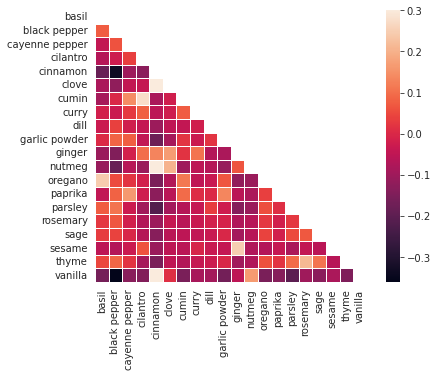

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):

    f, ax = plt.subplots(figsize=(7, 5))
    ax.tick_params(axis='x', labelrotation=45)

    sns.heatmap(corr, mask=mask, vmax=.3, square=True, linewidths=.5)



5 10
test
0.06900362528515051
test2
cup 0
cup 1
cup 2
cup 3
cup 4
teaspoon 0
teaspoon 1
teaspoon 2
teaspoon 3
teaspoon 4
tablespoon 0
tablespoon 1
tablespoon 2
tablespoon 3
tablespoon 4
pound 0
pound 1
pound 2
pound 3
pound 4
clove 0
clove 1
clove 2
clove 3
clove 4
ounce 0
ounce 1
ounce 2
ounce 3
ounce 4
pinch 0
pinch 1
pinch 2
pinch 3
pinch 4
slice 0
slice 1
slice 2
slice 3
slice 4
package 0
package 1
package 2
package 3
package 4
head 0
head 1
head 2
head 3
head 4
[[0.06900362528515051, 0.18406722277742651, 0.09225950862168115, 0.13921785156696243, 0.9913501824570888, 0.04137837471170804, 0.2568503462812406, 0.24427363566487317, 0.08059432687978388, 0.21333942439470077], [0.0584899249928129, 0.07136981365530651, 0.08177547355103558, 0.04497163093560794, 0.00304095147992972, 0.0271333604666938, 0.10087323095453177, 0.09146810146041506, 0.022062134173795586, 0.15897670169026953], [0.05710477484776416, 0.05248380276423759, 0.04051172707889126, 0.028216747267811582, 0.002094877686173807,

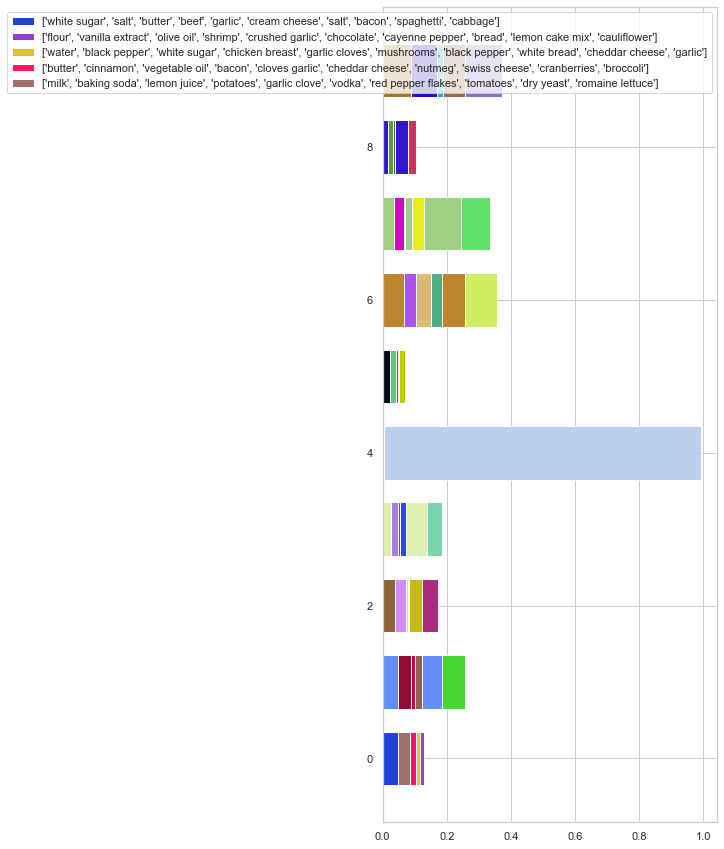

In [341]:
units = df["ingredient_unit"].value_counts().rename_axis(
       'ingredient_unit'
).reset_index(name='unit_counts').head(10)

NUM_INGREDIENTS_PER_BAR = 5

joined = df.merge(units, how="inner", on="ingredient_unit")
top_ingredients_by_unit = joined.groupby(
       ["ingredient_unit", "ingredient_name"]
).agg(
       name_count=("ingredient_name", "count"),
       unit_count=("unit_counts", "first")
).groupby(
       'ingredient_unit', as_index=False
).apply(lambda x: x.nlargest(NUM_INGREDIENTS_PER_BAR, 'name_count'))

new = top_ingredients_by_unit.assign(
       ingredient_freq=top_ingredients_by_unit["name_count"] / top_ingredients_by_unit["unit_count"]
)

# print(new)

new.reset_index(inplace=True)

# print(units["ingredient_unit"])



NUM_UNITS = len(units["ingredient_unit"])

print(NUM_INGREDIENTS_PER_BAR, NUM_UNITS)

values = [[0 for x in range(NUM_UNITS)] for y in range(NUM_INGREDIENTS_PER_BAR)]
labels = [[0 for x in range(NUM_UNITS)] for y in range(NUM_INGREDIENTS_PER_BAR)]
unit_labels = []

print("test")

# a list the length of the number of units
# where each element is a list the length of the
# top N ingredients for that unit

# unit = "cup"

print(new.loc[new["ingredient_unit"] == "cup"]["ingredient_freq"].iloc[0])

print("test2")
for unit_idx, unit in enumerate(units["ingredient_unit"]):
       unit_labels.append(unit)
       for i in range(NUM_INGREDIENTS_PER_BAR):
              print(unit, i)
              values[i][unit_idx] = new.loc[new["ingredient_unit"] == unit]["ingredient_freq"].iloc[i]
              labels[i][unit_idx] = new.loc[new["ingredient_unit"] == unit]["ingredient_name"].iloc[i]

print(values)
print(labels)

# reference:
# https://seaborn.pydata.org/examples/part_whole_bars.html

# TODO: break this down by ingredient
f, ax = plt.subplots(figsize=(6, 15))

import random


ypos = range(NUM_UNITS)

left = [0] * NUM_UNITS

for i in range(NUM_INGREDIENTS_PER_BAR):
       ax.barh(
              ypos,
              values[i],
              left=left,
              height=0.7,
              color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(100)],
              label=labels[i]
       )

       left = values[i]

# regular graph
# sns.barplot(x="ingredient_unit", y="unit_counts", data=units,
#        label="Alcohol-involved", color="b")
plt.legend()
plt.show()
